##データ分析の流れ  
①データの取り込み　▶無事取り込めてデータフレームに格納できていればOK  
②データ探索(EDA)　▶欠損はないか？異常値はないか？学習モデルが予測しやすいデータの形になっているか？追加すべき特徴量はないか？  
③データの前処理　▶探索した結果を元にデータを加工し、最終的に「欠損がなくintまたはfloatだけのデータ」にする  
④モデル作成、評価　▶処理したデータを使ってモデルを作成し、スコアの評価を実施、ベースラインモデル(機械学習を使わず予測したもの)を上回っているかを確認する  
⑤予測　▶作成したモデルを使って、予測用データを入力して予測値の出力を行う  

##データの取り込み、確認

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(font = "IPAexGothic", style = "white")

In [30]:
#データの取り込み
df_train_master = pd.read_csv("diabetes_train.csv")
df_submit_master = pd.read_csv("diabetes_test.csv")
display(df_train_master.head())
display(df_submit_master.head())

,index,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,76395,Female,42.0,0,0,never,28.71,6.0,90,0
1,30026,Male,56.0,0,0,current,29.64,5.8,159,0
2,759,Female,27.0,0,0,NaN,27.32,4.8,85,0
3,19671,Female,80.0,0,1,ever,25.33,6.8,280,1
4,17521,Male,45.0,0,0,former,32.54,6.0,130,1


,index,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,5558,Female,4.0,0,0,NaN,17.86,6.2,130
1,97213,Male,80.0,0,0,former,21.64,6.0,158
2,76753,Female,29.0,0,0,NaN,27.32,6.6,85
3,80862,Female,52.0,0,0,NaN,27.32,6.6,145
4,6732,Male,55.0,1,0,former,34.33,7.5,220


##データ探索(EDA)

In [31]:
#学習データ

display(df_train_master.info())
display(df_train_master.describe())
display(df_train_master.describe(include="object"))

#gender, smoking_historyに欠損がある
#0.08歳が存在する
#bmi0と88.76が存在する
#EmployeeCountは全部1の可能性あり

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21440 entries, 0 to 21439
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                21440 non-null  int64  
 1   gender               21434 non-null  object 
 2   age                  21440 non-null  float64
 3   hypertension         21440 non-null  int64  
 4   heart_disease        21440 non-null  int64  
 5   smoking_history      14751 non-null  object 
 6   bmi                  21440 non-null  float64
 7   HbA1c_level          21440 non-null  float64
 8   blood_glucose_level  21440 non-null  int64  
 9   diabetes             21440 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 1.6+ MB


None

,index,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,21440.000000,21440.000000,21440.000000,21440.000000,21440.000000,21440.000000,21440.000000,21440.000000
mean,49795.196082,46.820688,0.114552,0.068424,28.393059,5.868787,152.144636,0.314692
std,28917.870765,22.390530,0.318488,0.252477,7.421419,1.236452,51.930478,0.464404
min,9.000000,0.080000,0.000000,0.000000,0.000000,3.500000,80.000000,0.000000
25%,24738.750000,30.000000,0.000000,0.000000,24.630000,5.000000,126.000000,0.000000
50%,49722.500000,50.000000,0.000000,0.000000,27.320000,6.000000,145.000000,0.000000
75%,74729.250000,65.000000,0.000000,0.000000,31.420000,6.500000,160.000000,1.000000
max,99997.000000,80.000000,1.000000,1.000000,88.760000,9.000000,300.000000,1.000000


,gender,smoking_history
count,21434,14751
unique,2,5
top,Female,never
freq,12277,7696


In [32]:
#予測用データ

display(df_submit_master.info())
display(df_submit_master.describe())
display(df_submit_master.describe(include="object"))

#genderに欠損がない
#ageやbmiはこちらもおかしな値がある

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5360 entries, 0 to 5359
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                5360 non-null   int64  
 1   gender               5360 non-null   object 
 2   age                  5360 non-null   float64
 3   hypertension         5360 non-null   int64  
 4   heart_disease        5360 non-null   int64  
 5   smoking_history      3677 non-null   object 
 6   bmi                  5360 non-null   float64
 7   HbA1c_level          5360 non-null   float64
 8   blood_glucose_level  5360 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 377.0+ KB


None

,index,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
count,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000
mean,49935.414366,46.510731,0.130970,0.066045,28.456601,5.910280,152.639739
std,28850.439071,22.385855,0.337399,0.248384,7.350000,1.241354,52.141656
min,6.000000,0.080000,0.000000,0.000000,0.000000,3.500000,80.000000
25%,25518.750000,29.000000,0.000000,0.000000,24.720000,5.000000,126.000000
50%,49442.500000,49.000000,0.000000,0.000000,27.320000,6.000000,145.000000
75%,74805.250000,64.000000,0.000000,0.000000,31.672500,6.500000,160.000000
max,99983.000000,80.000000,1.000000,1.000000,81.730000,9.000000,300.000000


,gender,smoking_history
count,5360,3677
unique,2,5
top,Female,never
freq,3067,1950


0.31469216417910445

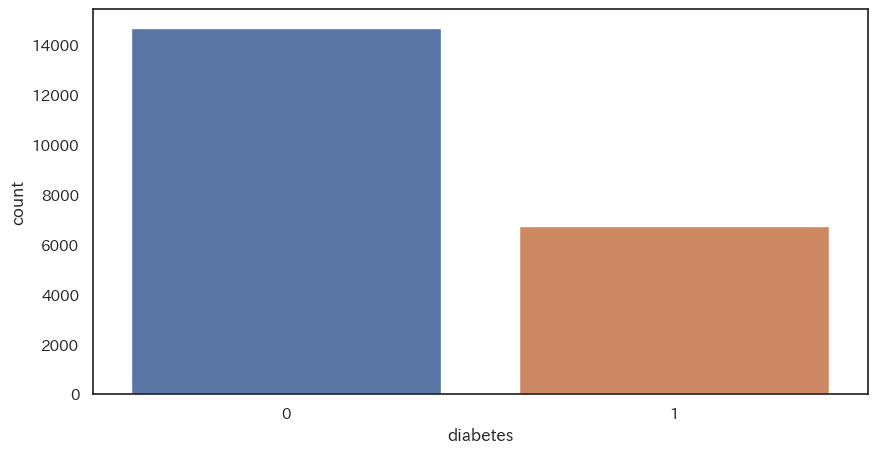

In [33]:
#diabetes

fig = plt.subplots(figsize=(10,5))
sns.countplot(x="diabetes", data=df_train_master)
df_train_master["diabetes"].mean()

#糖尿病の人は8000人弱で全体の31%ほど(全部0で予測した場合のaccuracyは0.69なので、それを上回る必要がある)

In [34]:
#gender 欠損調査

df_train_master.query('gender != gender')

#年齢などに気になる偏りはないが、全員糖尿病じゃないのは少し気になるところ(6件しかないため、たまたまの可能性も高い)
#submit用のデータに欠損はないため、消してしまうのが無難

,index,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1616,75302,NaN,26.0,0,0,not current,37.49,6.0,80,0
5207,31985,NaN,53.0,0,0,NaN,27.32,6.6,160,0
10543,67204,NaN,7.0,0,0,NaN,27.32,3.5,159,0
18105,18691,NaN,10.0,0,0,not current,16.59,6.1,160,0
18734,16702,NaN,39.0,0,0,not current,31.24,6.2,85,0
19460,71139,NaN,28.0,0,0,ever,27.32,4.5,126,0


,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,12277.0,0.289321,0.453466,0.0,0.0,0.0,1.0,1.0
Male,9157.0,0.348913,0.476653,0.0,0.0,0.0,1.0,1.0


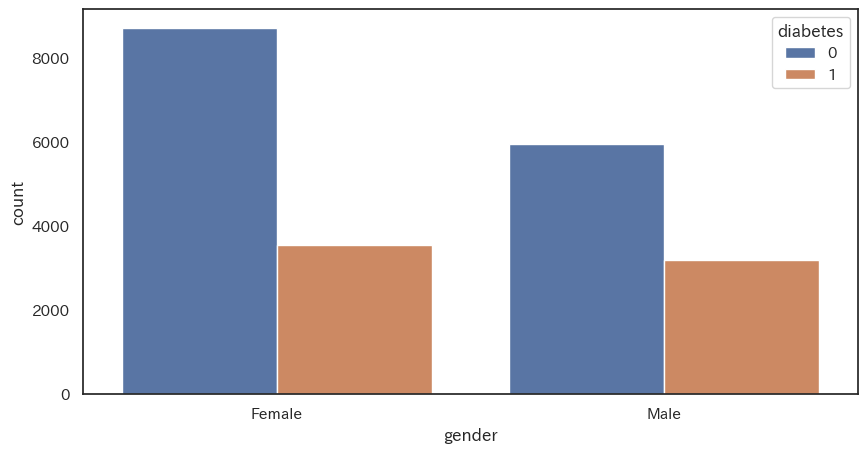

In [35]:
#gender

fig = plt.subplots(figsize=(10,5))
sns.countplot(x='gender', hue='diabetes', data=df_train_master);
df_train_master.groupby(["gender"]).describe()["diabetes"]

#男性の方が糖尿病率が高い傾向

In [36]:
#age 異常値調査

display(df_train_master.query('age <= 3'))

#どうやら3歳以下の乳児も含んだデータセットである様子

,index,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
56,67946,Male,0.72,0,0,NaN,16.00,3.5,140,0
58,4544,Female,1.80,0,0,NaN,13.85,6.1,200,0
70,23668,Female,0.72,0,0,NaN,14.37,4.8,80,0
207,89986,Female,0.80,0,0,NaN,16.70,6.5,145,0
211,72095,Male,3.00,0,0,NaN,17.90,6.6,90,0
...,...,...,...,...,...,...,...,...,...,...
21337,91786,Female,1.72,0,0,NaN,15.77,6.2,126,0
21351,42328,Female,0.48,0,0,NaN,18.86,6.2,200,0
21357,35769,Male,3.00,0,0,NaN,18.11,6.1,160,0
21389,21046,Female,1.40,0,0,NaN,15.60,5.8,130,0


In [37]:
#age 異常値調査2
#糖尿病診断を受けている人の最小年齢を調査(子供は糖尿病診断を受けない可能性もあるのではないか？？)

df_train_master.query('diabetes == 1')["age"].min()

#3歳でも糖尿病診断を受けている

3.0

/var/folders/nm/56v54w012vjgg8z075m4stp40000gn/T/ipykernel_19573/3922397051.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train_master.query('diabetes == 1')["age"], kde=False, label='diabetes', color="red")
/var/folders/nm/56v54w012vjgg8z075m4stp40000gn/T/ipykernel_19573/3922397051.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/

,count,mean,std,min,25%,50%,75%,max
diabetes,,,,,,,,
0,14693.0,40.326928,22.378458,0.08,22.0,40.0,57.0,80.0
1,6747.0,60.962205,14.516536,3.00,52.0,62.0,72.0,80.0


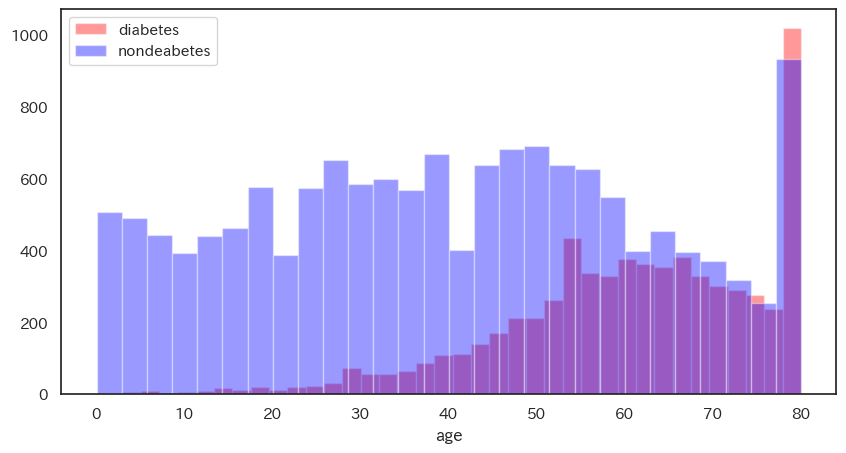

In [38]:
#age

fig = plt.subplots(figsize=(10,5))
sns.distplot(df_train_master.query('diabetes == 1')["age"], kde=False, label='diabetes', color="red")
sns.distplot(df_train_master.query('diabetes == 0')["age"], kde=False, label='nondeabetes', color="blue")
plt.legend()
df_train_master.groupby(["diabetes"]).describe()["age"]

#60歳までは線形状に徐々に糖尿病の割合が増えていく
#60歳以降はあまり差がなく、50%程度が糖尿病
#連続変数のまま扱うと60歳以上で線形性が保てないため、回帰分析の場合は10歳区切りで順序尺度に変換する方が良さそう(決定木は変換の必要なし)

,count,mean,std,min,25%,50%,75%,max
hypertension,,,,,,,,
0,18984.0,0.270333,0.444143,0.0,0.0,0.0,1.0,1.0
1,2456.0,0.657573,0.474618,0.0,0.0,1.0,1.0,1.0


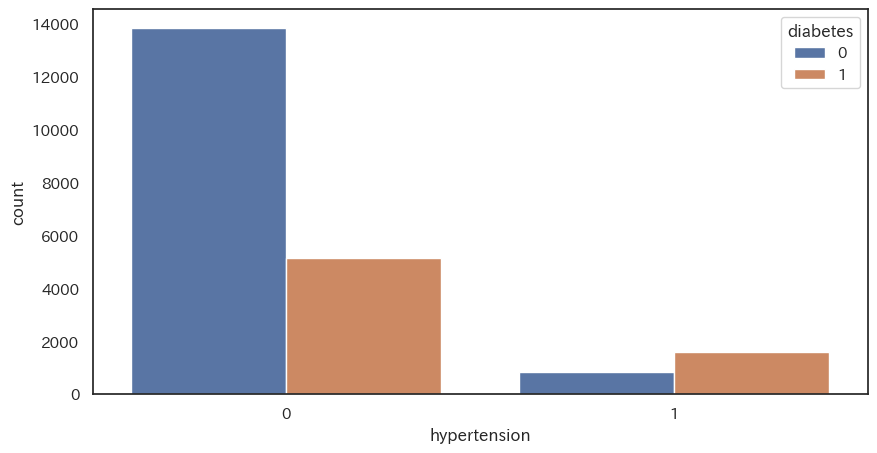

In [39]:
#hypertension

fig = plt.subplots(figsize=(10,5))
sns.countplot(x='hypertension', hue='diabetes', data=df_train_master);
df_train_master.groupby(["hypertension"]).describe()["diabetes"]

#高血圧者は糖尿病の確率が高い

,count,mean,std,min,25%,50%,75%,max
heart_disease,,,,,,,,
0,19973.0,0.287138,0.452438,0.0,0.0,0.0,1.0,1.0
1,1467.0,0.689843,0.462715,0.0,0.0,1.0,1.0,1.0


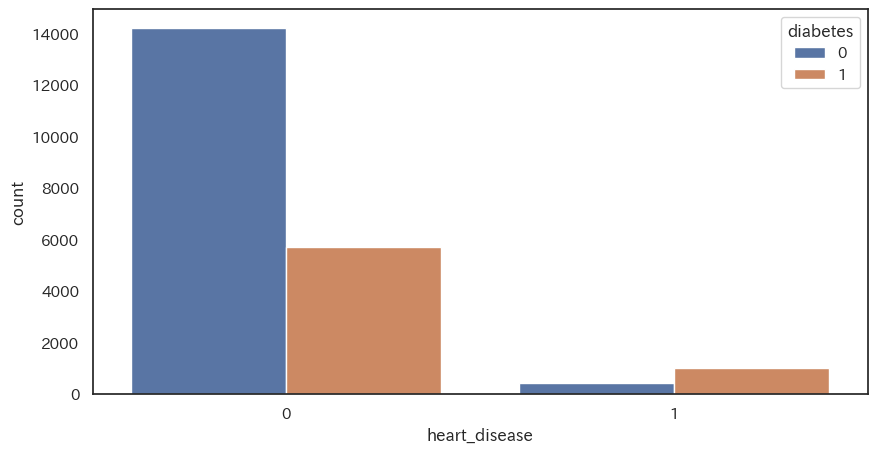

In [40]:
#heart_disease

fig = plt.subplots(figsize=(10,5))
sns.countplot(x='heart_disease', hue='diabetes', data=df_train_master);
df_train_master.groupby(["heart_disease"]).describe()["diabetes"]

#心臓病者は糖尿病の確率が高い

In [41]:
#smoking_history 欠損調査

df_train_master.query('smoking_history != smoking_history')

#明らかな偏りはないが、hypertension,heart_disease,diabetesといった病気持ちの人がが少なめな印象

,index,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2,759,Female,27.0,0,0,NaN,27.32,4.8,85,0
11,39131,Female,7.0,0,0,NaN,18.63,6.6,90,0
14,59450,Female,60.0,0,0,NaN,39.52,7.0,240,1
20,9143,Male,5.0,0,0,NaN,16.34,6.0,140,0
27,92444,Female,32.0,0,0,NaN,27.32,4.8,80,0
...,...,...,...,...,...,...,...,...,...,...
21429,91934,Female,13.0,0,0,NaN,27.32,6.1,140,0
21430,43944,Female,66.0,0,0,NaN,27.32,5.7,90,0
21432,38049,Female,7.0,0,0,NaN,16.94,6.5,85,0
21434,68540,Female,55.0,0,0,NaN,27.32,6.0,90,0


,count,mean,std,min,25%,50%,75%,max
smoking_history,,,,,,,,
NULL,6689.0,0.173270,0.378508,0.0,0.0,0.0,0.0,1.0
current,2099.0,0.358742,0.479746,0.0,0.0,0.0,1.0,1.0
ever,981.0,0.378186,0.485182,0.0,0.0,0.0,1.0,1.0
former,2491.0,0.509434,0.500011,0.0,0.0,1.0,1.0,1.0
never,7696.0,0.344075,0.475096,0.0,0.0,0.0,1.0,1.0
not current,1484.0,0.368598,0.482587,0.0,0.0,0.0,1.0,1.0


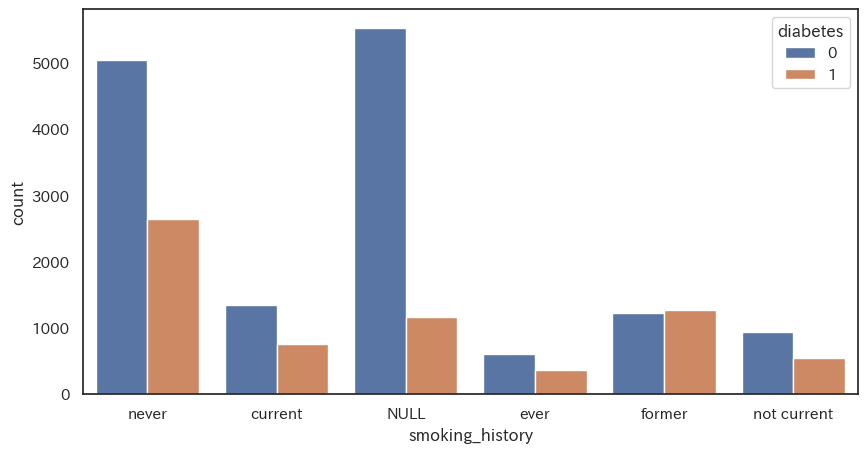

In [42]:
#smoking_history

df_graph = df_train_master.copy()
df_graph["smoking_history"] = df_graph["smoking_history"].apply(lambda x:"NULL" if x != x else x)
fig = plt.subplots(figsize=(10,5))
sns.countplot(x='smoking_history', hue='diabetes', data=df_graph)
df_graph.groupby(["smoking_history"]).describe()["diabetes"]

#former(過去に喫煙、今は禁煙), ever(過去に喫煙、今は不明), not current(過去は不明、今は禁煙), current(今も喫煙), never(未喫煙), NULL(過去も今も不明)という意味か？？
#欠損が一番糖尿病率が低く、何らかの意味を持っていそう
#formerは糖尿病率が高い傾向がある(年齢による疑似相関の可能性もあり)
#one-hot encodingでそれぞれのカテゴリーをダミー変数化するのが良さそう(baseはnever)

In [43]:
#bmi 異常値調査

display(df_train_master.query('bmi <= 10').sort_values("bmi", ascending=False))
display(df_train_master.query('bmi >= 50').sort_values("bmi", ascending=False))
df_train_master.query('bmi == 0')["diabetes"].mean()

#bmi10以下は全員0▶欠損が0で入っている可能性あり(68件の欠損データ)
#bmi50以上は一見問題のないデータに見える▶海外ならbmi80の人も存在するのかも？？とりあえず正しいデータだと考える
#bmi=0の糖尿病率は23.5%▶全体よりやや低め

,index,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
26,28080,Female,44.0,0,0,never,0.0,6.1,140,0
16405,90207,Female,42.0,0,0,never,0.0,5.7,159,0
18077,61776,Male,80.0,0,0,NaN,0.0,4.5,145,0
17735,26325,Female,61.0,1,0,former,0.0,8.2,260,1
17722,72657,Female,10.0,0,0,NaN,0.0,4.8,200,0
...,...,...,...,...,...,...,...,...,...,...
10711,28431,Male,80.0,1,0,former,0.0,8.2,140,1
11149,75465,Female,53.0,0,0,ever,0.0,6.0,160,0
11899,52299,Female,35.0,0,0,never,0.0,6.2,155,0
12079,98280,Female,23.0,0,0,NaN,0.0,4.5,159,0


,index,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
8588,96066,Male,80.0,0,0,never,88.76,6.2,140,0
10668,4551,Female,45.0,0,0,never,88.72,7.0,300,1
8659,90043,Female,34.0,0,0,NaN,87.70,6.0,126,0
12209,22454,Male,19.0,0,0,NaN,87.51,3.5,85,0
7384,24186,Male,49.0,0,0,former,83.74,6.8,155,1
...,...,...,...,...,...,...,...,...,...,...
7329,66322,Female,66.0,0,0,never,50.07,8.2,220,1
18316,6209,Female,64.0,0,0,not current,50.07,8.2,260,1
1251,45846,Female,57.0,1,0,never,50.05,7.5,160,1
11031,95961,Female,45.0,0,0,current,50.05,6.0,300,1


0.23529411764705882

/var/folders/nm/56v54w012vjgg8z075m4stp40000gn/T/ipykernel_19573/870662320.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train_master.query('diabetes == 1')["bmi"], kde=False, label='diabetes', color="red")
/var/folders/nm/56v54w012vjgg8z075m4stp40000gn/T/ipykernel_19573/870662320.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

,count,mean,std,min,25%,50%,75%,max
diabetes,,,,,,,,
0,14693.0,26.764114,6.664247,0.0,23.05,27.32,28.83,88.76
1,6747.0,31.940427,7.742631,0.0,27.32,29.95,35.91,88.72


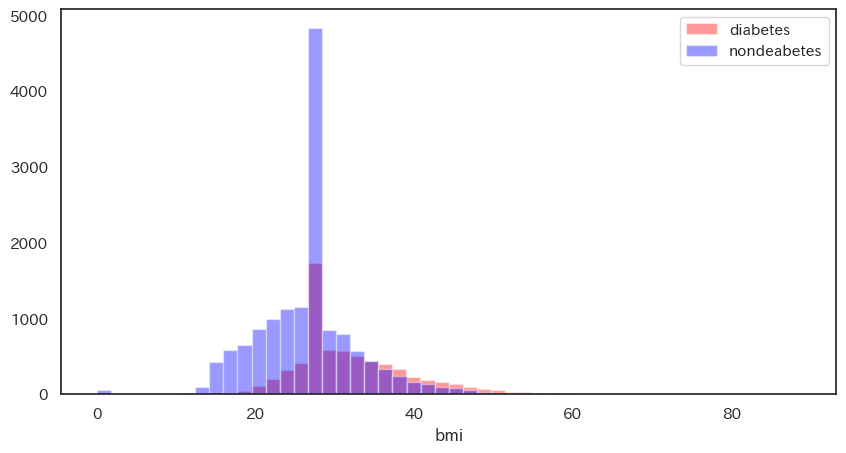

In [44]:
#bmi

fig = plt.subplots(figsize=(10,5))
sns.distplot(df_train_master.query('diabetes == 1')["bmi"], kde=False, label='diabetes', color="red")
sns.distplot(df_train_master.query('diabetes == 0')["bmi"], kde=False, label='nondeabetes', color="blue")
plt.legend()
df_train_master.groupby(["diabetes"]).describe()["bmi"]

#bmiが高くなるにつれて、徐々に糖尿病率が高くなっていく
#中央値の27前後の数が多いため、欠損は中央値で補完して対応する

/var/folders/nm/56v54w012vjgg8z075m4stp40000gn/T/ipykernel_19573/141768176.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train_master.query('diabetes == 1')["HbA1c_level"], kde=False, label='diabetes', color="red")
/var/folders/nm/56v54w012vjgg8z075m4stp40000gn/T/ipykernel_19573/141768176.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mw

,count,mean,std,min,25%,50%,75%,max
diabetes,,,,,,,,
0,14693.0,5.381331,0.973296,3.5,4.5,5.7,6.1,6.6
1,6747.0,6.930325,1.072820,5.7,6.1,6.6,7.5,9.0


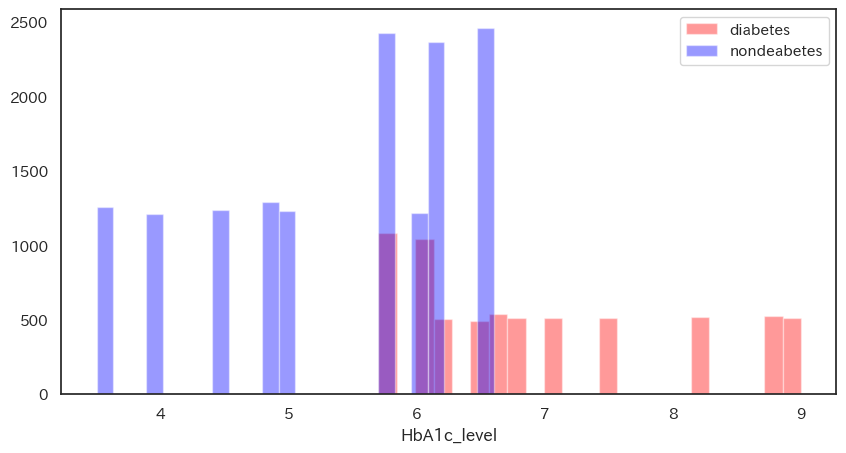

In [45]:
#HbA1c_level

fig = plt.subplots(figsize=(10,5))
sns.distplot(df_train_master.query('diabetes == 1')["HbA1c_level"], kde=False, label='diabetes', color="red")
sns.distplot(df_train_master.query('diabetes == 0')["HbA1c_level"], kde=False, label='nondeabetes', color="blue")
plt.legend()
df_train_master.groupby(["diabetes"]).describe()["HbA1c_level"]

#HbA1cが6.5%以上が糖尿病診断の基準の一つ
#5.5以下は全員非糖尿病、5.5~7がグレーゾーン、7以上は全員糖尿病
#「5.5以下か否か」、「7以上か否か」のダミー変数に変換(この条件では機械学習を使わずにルールベースで予測値を決めてしまっても良し)

/var/folders/nm/56v54w012vjgg8z075m4stp40000gn/T/ipykernel_19573/1590538352.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train_master.query('diabetes == 1')["blood_glucose_level"], kde=False, label='diabetes', color="red")
/var/folders/nm/56v54w012vjgg8z075m4stp40000gn/T/ipykernel_19573/1590538352.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.git

,count,mean,std,min,25%,50%,75%,max
diabetes,,,,,,,,
0,14693.0,132.831757,34.069874,80.0,100.0,140.0,158.0,200.0
1,6747.0,194.202460,58.829767,126.0,145.0,160.0,240.0,300.0


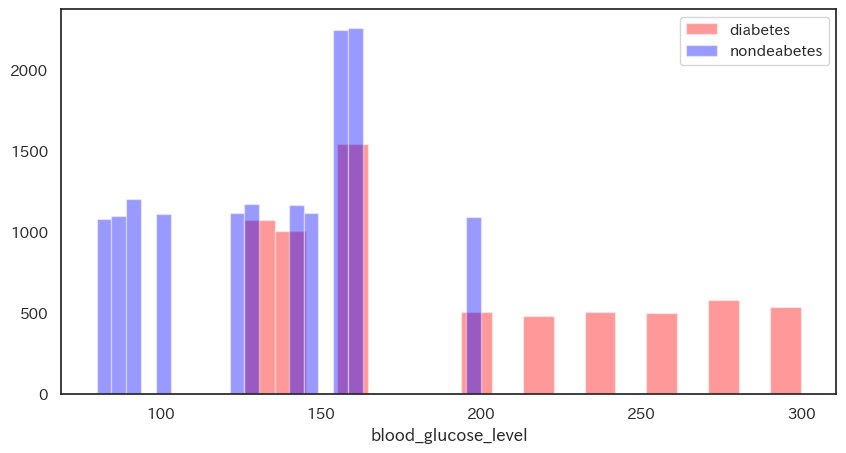

In [46]:
#blood_glucose_level

fig = plt.subplots(figsize=(10,5))
sns.distplot(df_train_master.query('diabetes == 1')["blood_glucose_level"], kde=False, label='diabetes', color="red")
sns.distplot(df_train_master.query('diabetes == 0')["blood_glucose_level"], kde=False, label='nondeabetes', color="blue")
plt.legend()
df_train_master.groupby(["diabetes"]).describe()["blood_glucose_level"]

#空腹時血糖126以上、随時血糖値200以上が糖尿病診断基準の一つ(今回のデータは空腹時なのか随時なのか不明)
#HbA1cと同様
#「126より小さいか否か」、「200より大きいか否か」のダミー変数に変換(この条件では機械学習を使わずにルールベースで予測値を決めてしまっても良し)

##機械学習の前処理

In [47]:
#変数の再確認
df_train_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21440 entries, 0 to 21439
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                21440 non-null  int64  
 1   gender               21434 non-null  object 
 2   age                  21440 non-null  float64
 3   hypertension         21440 non-null  int64  
 4   heart_disease        21440 non-null  int64  
 5   smoking_history      14751 non-null  object 
 6   bmi                  21440 non-null  float64
 7   HbA1c_level          21440 non-null  float64
 8   blood_glucose_level  21440 non-null  int64  
 9   diabetes             21440 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 1.6+ MB


In [48]:
df_train_master.head(10)

,index,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,76395,Female,42.0,0,0,never,28.71,6.0,90,0
1,30026,Male,56.0,0,0,current,29.64,5.8,159,0
2,759,Female,27.0,0,0,NaN,27.32,4.8,85,0
3,19671,Female,80.0,0,1,ever,25.33,6.8,280,1
4,17521,Male,45.0,0,0,former,32.54,6.0,130,1
5,56282,Female,32.0,0,0,never,35.57,6.6,145,1
6,28919,Female,80.0,0,1,former,29.62,8.8,200,1
7,47636,Female,36.0,0,0,never,24.31,6.1,85,0
8,97318,Male,65.0,1,0,ever,34.70,5.8,300,1
9,15839,Male,64.0,1,0,current,33.22,6.8,126,1


In [49]:
df_train_master["smoking_history"].unique()

array(['never', 'current', nan, 'ever', 'former', 'not current'],
      dtype=object)

In [50]:
#機械学習用のデータフレームを作成
df_train = df_train_master.copy()
df_submit = df_submit_master.copy()

#indexは削除
df_train = df_train.drop("index",axis=1)

#gender 欠損の削除＋Maleを1,Femaleを0にダミー変換
df_train = df_train.query('gender == gender')
df_train["gender"] = df_train["gender"].apply(lambda x: 1 if x == "Male" else 0)
df_submit["gender"] = df_submit["gender"].apply(lambda x: 1 if x == "Male" else 0)

#age 10歳区切りで順序尺度に変換
df_train["age"] = df_train["age"] // 10
df_submit["age"] = df_submit["age"] // 10

#hypertension 処理なし
#heart_desease 処理なし

#smoking_history 欠損を一つのカテゴリーとして扱い、one-hot encodingでそれぞれのカテゴリーをダミー変換(baseはnever)
df_train["smoking_history_NULL"] = df_train["smoking_history"].apply(lambda x: 1 if x != x else 0)
df_train["smoking_history_ever"] = df_train["smoking_history"].apply(lambda x: 1 if x == "ever" else 0)
df_train["smoking_history_current"] = df_train["smoking_history"].apply(lambda x: 1 if x == "current" else 0)
df_train["smoking_history_not_current"] = df_train["smoking_history"].apply(lambda x: 1 if x == "not current" else 0)
df_train["smoking_history_former"] = df_train["smoking_history"].apply(lambda x: 1 if x == "former" else 0)
df_train = df_train.drop("smoking_history", axis=1)
df_submit["smoking_history_NULL"] = df_submit["smoking_history"].apply(lambda x: 1 if x != x else 0)
df_submit["smoking_history_ever"] = df_submit["smoking_history"].apply(lambda x: 1 if x == "ever" else 0)
df_submit["smoking_history_current"] = df_submit["smoking_history"].apply(lambda x: 1 if x == "current" else 0)
df_submit["smoking_history_not_current"] = df_submit["smoking_history"].apply(lambda x: 1 if x == "not current" else 0)
df_submit["smoking_history_former"] = df_submit["smoking_history"].apply(lambda x: 1 if x == "former" else 0)
df_submit = df_submit.drop("smoking_history", axis=1)

#bmi 0は中央値で補完
df_train["bmi"] = df_train["bmi"].fillna(df_train["bmi"].median())
df_submit["bmi"] = df_submit["bmi"].fillna(df_train["bmi"].median())

#HbA1c_level 「5.5以下か否か」、「7以上か否か」のダミー変換
df_train["HbA1c_5.5under"] = df_train["HbA1c_level"].apply(lambda x: 1 if x <= 5.5 else 0)
df_train["HbA1c_7.0over"] = df_train["HbA1c_level"].apply(lambda x: 1 if x >= 7.0 else 0)
df_train = df_train.drop("HbA1c_level", axis=1)
df_submit["HbA1c_5.5under"] = df_submit["HbA1c_level"].apply(lambda x: 1 if x <= 5.5 else 0)
df_submit["HbA1c_7.0over"] = df_submit["HbA1c_level"].apply(lambda x: 1 if x >= 7.0 else 0)
df_submit = df_submit.drop("HbA1c_level", axis=1)

#blood_glucose_level 「126より小さいか否か」、「200より大きいか否か」のダミー変換
df_train["glucose_126under"] = df_train["blood_glucose_level"].apply(lambda x: 1 if x < 126 else 0)
df_train["glucose_200over"] = df_train["blood_glucose_level"].apply(lambda x: 1 if x > 200 else 0)
df_train = df_train.drop("blood_glucose_level", axis=1)
df_submit["glucose_126under"] = df_submit["blood_glucose_level"].apply(lambda x: 1 if x < 126 else 0)
df_submit["glucose_200over"] = df_submit["blood_glucose_level"].apply(lambda x: 1 if x > 200 else 0)
df_submit = df_submit.drop("blood_glucose_level", axis=1)

#データの確認
display(df_train.info())
display(df_train.describe())
display(df_submit.info())
display(df_submit.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 21434 entries, 0 to 21439
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       21434 non-null  int64  
 1   age                          21434 non-null  float64
 2   hypertension                 21434 non-null  int64  
 3   heart_disease                21434 non-null  int64  
 4   bmi                          21434 non-null  float64
 5   diabetes                     21434 non-null  int64  
 6   smoking_history_NULL         21434 non-null  int64  
 7   smoking_history_ever         21434 non-null  int64  
 8   smoking_history_current      21434 non-null  int64  
 9   smoking_history_not_current  21434 non-null  int64  
 10  smoking_history_former       21434 non-null  int64  
 11  HbA1c_5.5under               21434 non-null  int64  
 12  HbA1c_7.0over                21434 non-null  int64  
 13  glucose_126under     

None

,gender,age,hypertension,heart_disease,bmi,diabetes,smoking_history_NULL,smoking_history_ever,smoking_history_current,smoking_history_not_current,smoking_history_former,HbA1c_5.5under,HbA1c_7.0over,glucose_126under,glucose_200over
count,21434.000000,21434.000000,21434.000000,21434.000000,21434.000000,21434.000000,21434.000000,21434.000000,21434.000000,21434.000000,21434.000000,21434.000000,21434.000000,21434.000000,21434.000000
mean,0.427218,4.263273,0.114584,0.068443,28.393202,0.314780,0.311981,0.045722,0.097929,0.069096,0.116217,0.290286,0.120230,0.210040,0.121956
std,0.494686,2.286213,0.318527,0.252510,7.421723,0.464439,0.463313,0.208886,0.297225,0.253623,0.320493,0.453905,0.325237,0.407346,0.327242
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,0.000000,24.630000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.000000,0.000000,0.000000,27.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,6.000000,0.000000,0.000000,31.420000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,8.000000,1.000000,1.000000,88.760000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5360 entries, 0 to 5359
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        5360 non-null   int64  
 1   gender                       5360 non-null   int64  
 2   age                          5360 non-null   float64
 3   hypertension                 5360 non-null   int64  
 4   heart_disease                5360 non-null   int64  
 5   bmi                          5360 non-null   float64
 6   smoking_history_NULL         5360 non-null   int64  
 7   smoking_history_ever         5360 non-null   int64  
 8   smoking_history_current      5360 non-null   int64  
 9   smoking_history_not_current  5360 non-null   int64  
 10  smoking_history_former       5360 non-null   int64  
 11  HbA1c_5.5under               5360 non-null   int64  
 12  HbA1c_7.0over                5360 non-null   int64  
 13  glucose_126under  

None

,index,gender,age,hypertension,heart_disease,bmi,smoking_history_NULL,smoking_history_ever,smoking_history_current,smoking_history_not_current,smoking_history_former,HbA1c_5.5under,HbA1c_7.0over,glucose_126under,glucose_200over
count,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000
mean,49935.414366,0.427799,4.227052,0.130970,0.066045,28.456601,0.313993,0.041791,0.100000,0.070149,0.110261,0.280037,0.126119,0.211567,0.123694
std,28850.439071,0.494806,2.287943,0.337399,0.248384,7.350000,0.464157,0.200130,0.300028,0.255422,0.313244,0.449059,0.332015,0.408458,0.329263
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25518.750000,0.000000,2.000000,0.000000,0.000000,24.720000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49442.500000,0.000000,4.000000,0.000000,0.000000,27.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74805.250000,1.000000,6.000000,0.000000,0.000000,31.672500,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,99983.000000,1.000000,8.000000,1.000000,1.000000,81.730000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

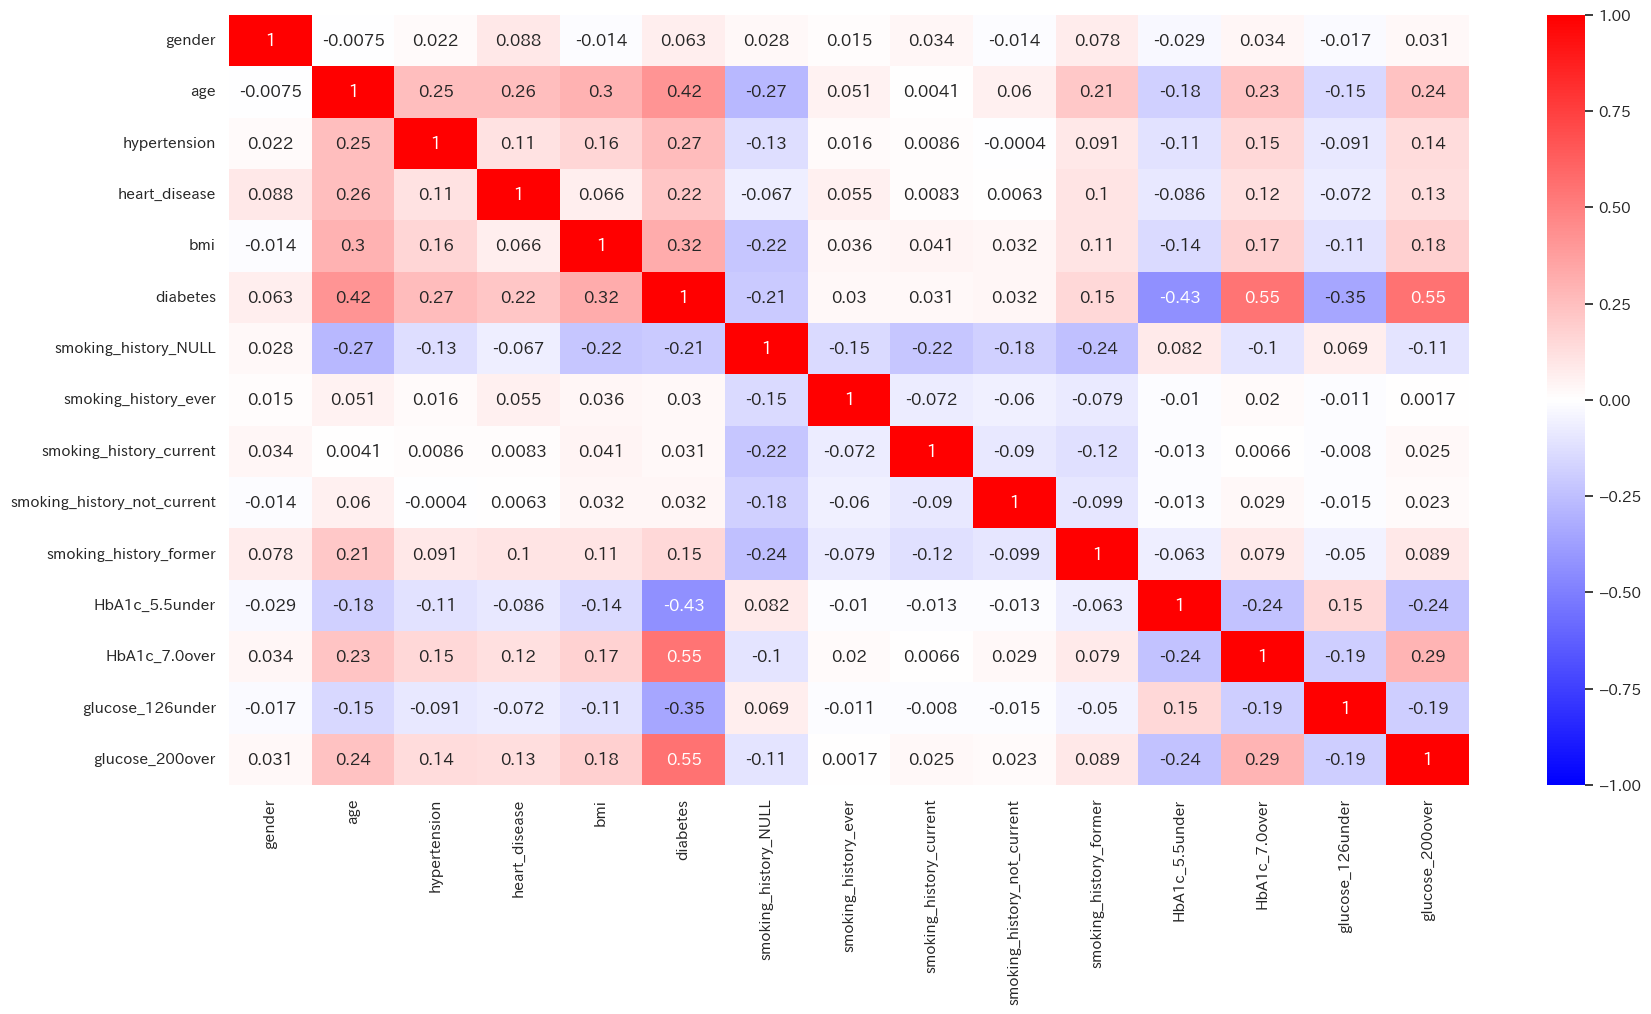

In [51]:
fig = plt.subplots(figsize=(20,10))
sns.heatmap(df_train.corr(), cmap="bwr", annot=True, vmax=1, vmin=-1, center=0)

In [52]:
#説明変数と目的変数に分割
X = df_train.drop("diabetes", axis=1)
y = df_train["diabetes"]

##モデル作成と評価

In [53]:
#ロジスティック回帰(sklearn)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty="l1", solver="liblinear", C=1) #C値で正則化の強さを調整(低いほど強い)
lr.fit(X_train, y_train)
y_pred_proba = lr.predict_proba(X_test)[:, 1]
y_pred = np.where(y_pred_proba>0.5, 1, 0) 

#スコア算出
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, log_loss
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))
print('recall = ', recall_score(y_true=y_test, y_pred=y_pred))
print("precision = ", precision_score(y_true=y_test,y_pred=y_pred))
print("log_loss = ", log_loss(y_true=y_test, y_pred=y_pred_proba))
pd.DataFrame(lr.coef_, columns=X.columns) 

confusion matrix = 
 [[2813  146]
 [ 250 1078]]
accuracy =  0.907627711686494
recall =  0.8117469879518072
precision =  0.880718954248366
log_loss =  0.17996514792225354


,gender,age,hypertension,heart_disease,bmi,smoking_history_NULL,smoking_history_ever,smoking_history_current,smoking_history_not_current,smoking_history_former,HbA1c_5.5under,HbA1c_7.0over,glucose_126under,glucose_200over
0,0.320219,0.419531,0.859406,0.907689,0.084724,-0.682352,-0.043397,0.098591,-0.095913,0.107782,-7.39403,7.923595,-6.904547,7.877565


In [54]:
#標準化偏回帰係数を確認

#標準化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_std = ss.fit_transform(X)
X_std = pd.DataFrame(X_std,columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=1)
lr2 = LogisticRegression(penalty="l1", solver="liblinear", C=1) 
lr2.fit(X_train, y_train)
y_pred = lr2.predict(X_test)

#標準化偏回帰係数を算出
pd.DataFrame(lr2.coef_, columns=X_std.columns).T

#HbA1c,glucoseが糖尿病予測に寄与、次点はage,bmi

,0
gender,0.160558
age,0.964330
hypertension,0.275452
heart_disease,0.231945
bmi,0.636555
smoking_history_NULL,-0.316828
smoking_history_ever,-0.012090
smoking_history_current,0.031520
smoking_history_not_current,-0.026636
smoking_history_former,0.035697


confusion matrix = 
 [[2809  150]
 [ 249 1079]]
accuracy =  0.906927921623513
recall =  0.8125
precision =  0.8779495524816925
log_loss= 0.1876756850802004


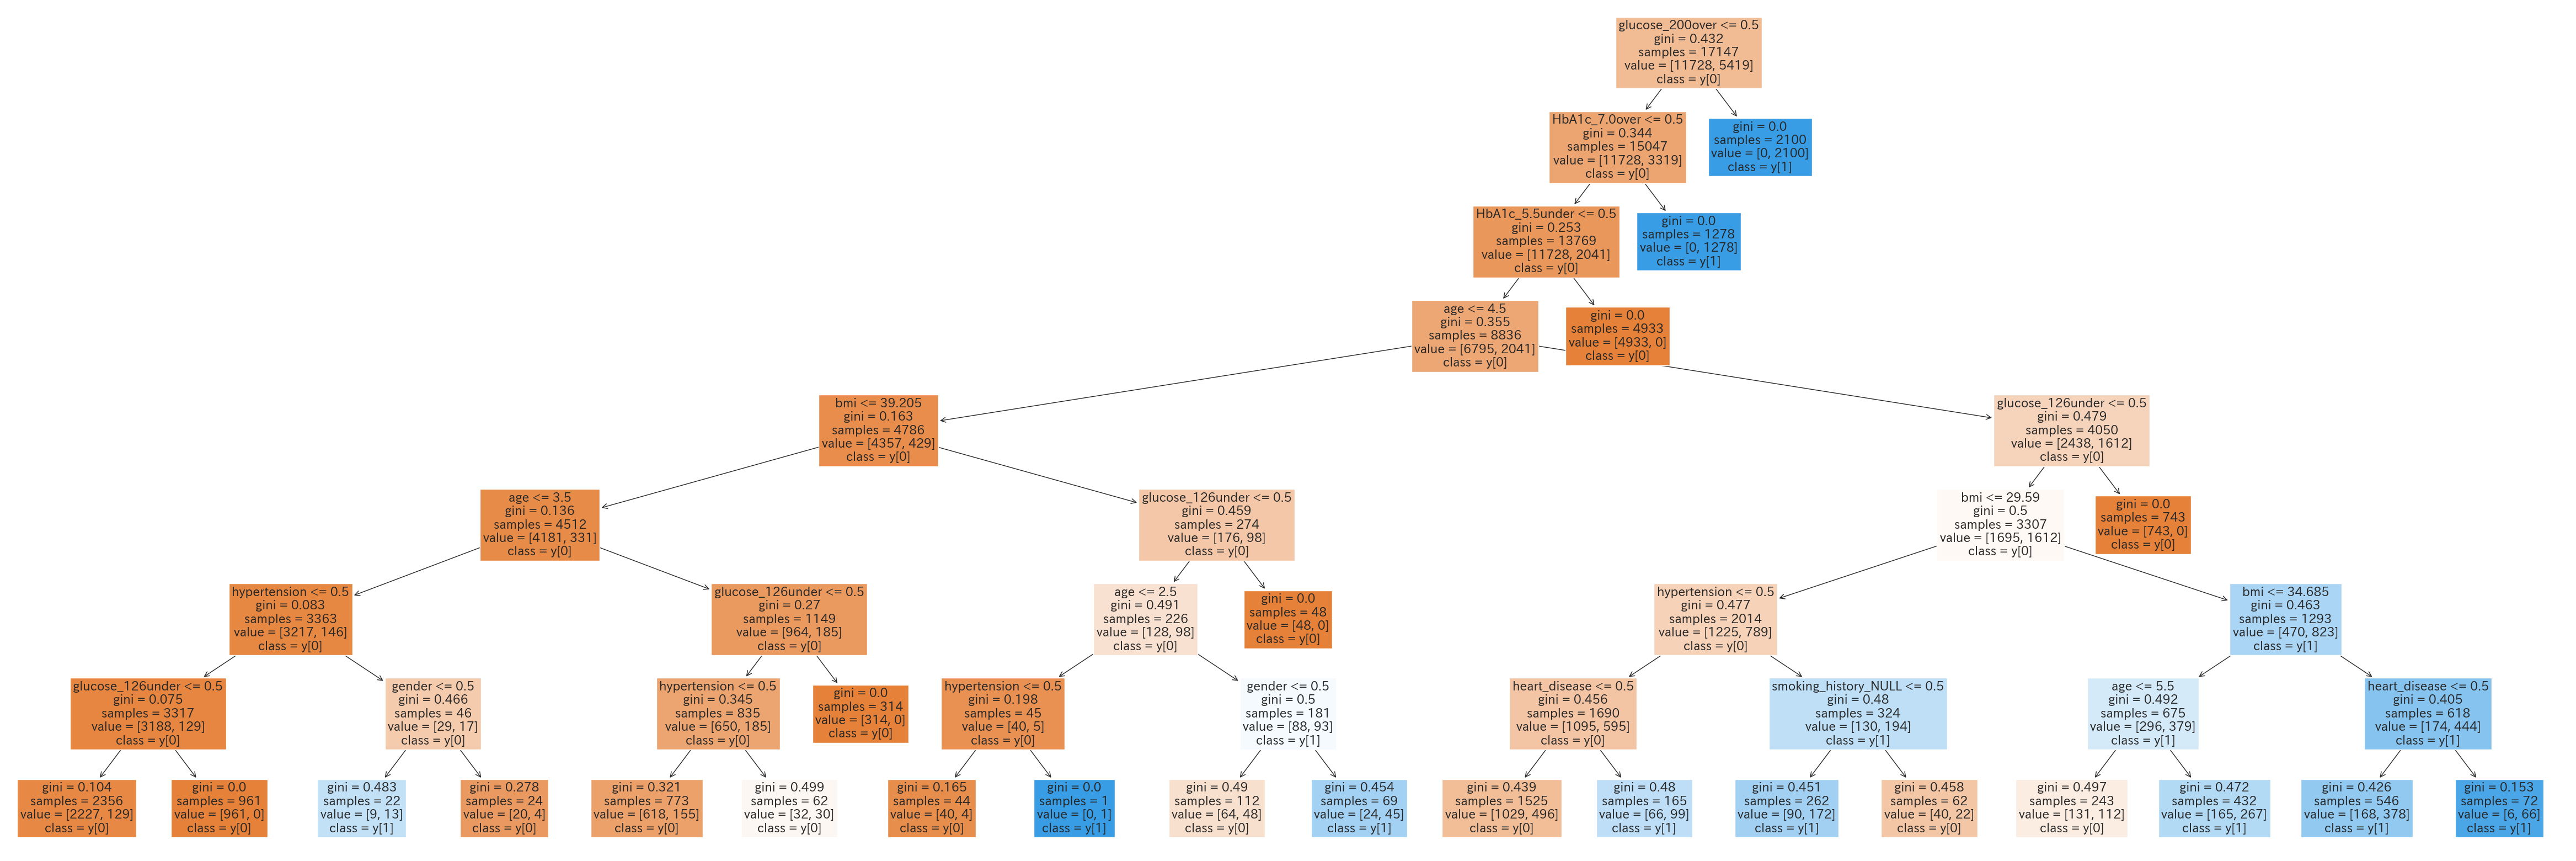

In [55]:
#決定木分析
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=8, random_state=1) #max_depthを指定
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

#スコア算出
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, log_loss
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))
print('recall = ', recall_score(y_true=y_test, y_pred=y_pred))
print("precision = ", precision_score(y_true=y_test,y_pred=y_pred))
print("log_loss=", log_loss(y_test, y_pred_proba))

#可視化
from sklearn.tree import plot_tree
plt.figure(figsize=(60,20))
plot_tree(clf, feature_names=X_train.columns, class_names=True, filled=True, fontsize=16);

#分類にメインで使っている特徴量はロジスティックとほぼ一緒(本当はHbA1cやglucose、ageは変換前の連続値を使った方が良いが、ややこしいのでここでは回帰分析の特徴量をそのまま使用)
#ロジスティック回帰の方がスコアが良いのでそちらを採用

In [56]:
#ベースラインモデル 全て0で予測
y_pred = [0] * len(y_test)
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))

#accuracyがベースラインを上回っていることを確認

accuracy =  0.6902262654536973


##予測

In [57]:
#作成したモデルでsubmitデータを予測
X_submit = df_submit.drop("index", axis=1)
pred = lr.predict(X_submit)
df_submit["y"] = pred
submit_data = df_submit[["index", "y"]].set_index("index")
submit_data.to_csv("diabetes_submit.csv", index=True)
submit_data
#最終スコア0.913

,y
index,
5558,0
97213,1
76753,0
80862,0
6732,1
...,...
35421,0
74787,1
78701,0
